# Module 9: Naive Bayes

## Topic 1: Naive Bayes - Part 1

### For this first example, we're going to predict the flu based on symptoms

In [1]:
# from https://www.kaggle.com/saptarsi/naiveflu
import pandas as pd
flu_data = pd.read_csv('naivebayes_flu.csv')

In [2]:
print(flu_data.shape)
flu_data.head(8)

(8, 5)


,Chills,runny nose,head ache,fever,Flu
0,Y,N,Mild,Y,N
1,Y,Y,No,N,Y
2,Y,N,Strong,Y,Y
3,N,Y,Mild,Y,Y
4,N,N,No,N,N
5,N,Y,Strong,Y,Y
6,N,Y,Strong,N,N
7,Y,Y,Mild,Y,Y


### You can see that the values are not numbers.  Let's fix this so we can use this data in our model.  We're going to use label encoding.

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
flu_data['Chills'] = le.fit_transform(flu_data['Chills'].astype('str'))
flu_data['runny nose'] = le.fit_transform(flu_data['runny nose'].astype('str'))
flu_data['head ache'] = le.fit_transform(flu_data['head ache'].astype('str'))
flu_data['fever'] = le.fit_transform(flu_data['fever'].astype('str'))
flu_data['Flu'] = le.fit_transform(flu_data['Flu'].astype('str'))

In [4]:
flu_data.head(8)

,Chills,runny nose,head ache,fever,Flu
0,1,0,0,1,0
1,1,1,1,0,1
2,1,0,2,1,1
3,0,1,0,1,1
4,0,0,1,0,0
5,0,1,2,1,1
6,0,1,2,0,0
7,1,1,0,1,1


In [5]:
print((flu_data['fever']).dtype)

int32


In [6]:
ind_flu_data = flu_data.loc[:,'Chills':'fever'].to_numpy()
dep_flu_data = flu_data['Flu'].to_numpy()
print(ind_flu_data)
print(dep_flu_data)

[[1 0 0 1]
 [1 1 1 0]
 [1 0 2 1]
 [0 1 0 1]
 [0 0 1 0]
 [0 1 2 1]
 [0 1 2 0]
 [1 1 0 1]]
[0 1 1 1 0 1 0 1]


In [7]:
from sklearn.naive_bayes import GaussianNB
flu_NB = GaussianNB()
flu_NB.fit(ind_flu_data, dep_flu_data)

GaussianNB()

In [8]:
model_output = flu_NB.predict(ind_flu_data)
print(model_output)
print(dep_flu_data)

[1 1 1 1 0 1 0 1]
[0 1 1 1 0 1 0 1]


In [9]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(dep_flu_data,model_output)
ac = accuracy_score(dep_flu_data,model_output)

In [10]:
print(cm,ac,sep='\n\n')

[[2 1]
 [0 5]]

0.875


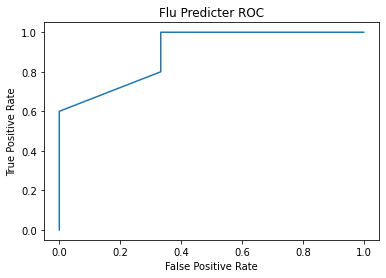

0.9


In [11]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
Y_gnb_score = flu_NB.predict_proba(ind_flu_data)

fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(dep_flu_data, Y_gnb_score[:, 1])

plt.plot(fpr_gnb,tpr_gnb)
plt.title("Flu Predicter ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print(roc_auc_score(dep_flu_data,Y_gnb_score[:,1]))

## Topic 2: Naive Bayes - Part 2

### Now we're going to dive right in to a complex example.  We're looking at an example using Naive Bayes for a set of data with ~2000 data points and 20 features.  We're going to use it to predict the correct price range for a cell phone

### This time around I'm going to be using one-hot encoding instead of label encoding

### The dataset already has a defined train and test dataset.  The dependent variable is one of 4 values - 0, 1, 2, 3

In [12]:
import pandas as pd
cell_train = pd.read_csv('cell_price_train.csv')
cell_test = pd.read_csv('cell_price_test.csv')

In [13]:
print(cell_train.columns)
cell_train.head()

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### We'll need to split our data into ind/dep/test

### The large range of numbers makes it a good idea to scale our data so no single feature saturates the results.

### We don't want to scale our categorical information, however, we want to encode it instead.

In [14]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder

cell_train_ind = cell_train.loc[:,"battery_power":"wifi"].to_numpy()
cell_train_dep = cell_train.loc[:,"price_range"]
cell_test_ind = cell_test.loc[:,"battery_power":"wifi"].to_numpy()

cols_to_scale = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
                 'px_height', 'px_width', 'ram', 'sc_h','sc_w','talk_time']
cols_to_not_scale = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']
cols_to_scale = [cell_train.columns.get_loc(c) for c in cols_to_scale]
#print(cols_to_scale)
cols_to_not_scale = [cell_train.columns.get_loc(c) for c in cols_to_not_scale]
#print(cols_to_not_scale)
sc = StandardScaler()
ohe = OneHotEncoder(sparse=False)
#print(cell_train_ind[:,cols_to_scale])
data_to_scale = cell_train_ind[:,cols_to_scale]
data_to_not_scale = cell_train_ind[:,cols_to_not_scale]
#print((cell_train_ind[:,cols_to_not_scale]).shape)
cell_train_ind_scaled = sc.fit_transform(data_to_scale)
cell_train_ind_enc = ohe.fit_transform(data_to_not_scale)
#cell_test_ind = sc.transform(cell_test_ind)
#print(cell_train_ind_scaled.shape)
#print(cell_train_ind_enc.shape)
cell_train_ind = np.concatenate([cell_train_ind_scaled,cell_train_ind_enc],axis=1)
print(cell_train_ind)
print(cell_train_ind.shape)

[[-0.90259726  0.83077942 -0.76249466 ...  0.          0.
   1.        ]
 [-0.49513857 -1.2530642  -0.99289039 ...  1.          1.
   0.        ]
 [-1.5376865  -1.2530642  -0.53209893 ...  1.          1.
   0.        ]
 ...
 [ 1.53077336 -0.76274805 -0.76249466 ...  1.          1.
   0.        ]
 [ 0.62252745 -0.76274805 -0.07130748 ...  1.          0.
   1.        ]
 [-1.65833069  0.58562134  0.15908825 ...  1.          0.
   1.        ]]
(2000, 26)


### Now we can train our model with our training data

In [15]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(cell_train_ind, cell_train_dep)

GaussianNB()

In [16]:
test_data_to_scale = cell_test_ind[:,cols_to_scale]
test_data_to_not_scale = cell_test_ind[:,cols_to_not_scale]
cell_test_ind_scaled = sc.fit_transform(test_data_to_scale)
cell_test_ind_enc = ohe.fit_transform(test_data_to_not_scale)
cell_test_ind = np.concatenate([cell_test_ind_scaled,cell_test_ind_enc],axis=1)

test_data_pred = classifier.predict(cell_test_ind)
print(test_data_pred)

[3 3 2 3 1 3 3 1 3 0 3 3 0 0 2 0 1 2 3 2 1 3 1 1 3 0 2 0 3 0 2 0 3 0 0 1 3
 1 2 2 1 2 0 0 0 0 1 2 1 2 2 0 2 1 3 0 3 1 1 3 3 3 1 1 1 1 1 2 1 1 1 1 2 3
 3 0 2 0 2 3 0 3 3 0 3 0 3 1 2 0 1 1 2 0 2 1 0 2 1 3 1 0 0 2 1 2 0 1 2 3 3
 3 1 3 3 3 3 1 3 0 0 3 2 1 1 0 3 2 2 1 0 1 1 2 3 1 1 0 3 2 1 2 2 2 3 3 3 2
 2 3 2 3 0 0 2 2 3 3 3 3 2 2 3 3 3 3 1 0 3 0 0 0 1 0 0 1 0 0 2 2 0 0 0 1 2
 2 1 1 0 0 0 0 0 3 1 0 2 1 2 3 1 2 3 3 3 1 2 1 0 1 2 2 1 2 3 3 0 2 0 3 2 2
 2 0 0 1 0 3 0 1 0 2 2 1 3 0 3 0 3 1 2 0 0 2 1 2 2 3 1 1 3 0 0 2 3 3 1 3 1
 0 3 2 1 2 3 3 3 1 0 1 2 3 1 1 3 2 0 3 0 1 2 0 0 3 2 3 2 2 1 3 2 2 3 2 2 1
 1 0 2 3 1 0 0 3 0 3 1 1 1 0 1 3 1 3 1 2 1 2 0 0 0 1 3 1 0 0 0 3 1 1 3 3 1
 3 3 2 3 1 3 3 2 2 2 3 3 0 3 0 3 1 3 1 3 3 0 1 1 3 1 3 1 3 0 0 0 0 2 0 1 1
 1 1 1 2 2 0 1 0 0 3 2 1 3 1 2 2 2 1 3 1 1 2 2 1 2 0 1 1 0 3 2 0 0 2 0 0 1
 0 0 0 0 2 2 3 2 3 0 3 1 3 0 1 1 1 2 0 3 2 3 3 1 3 1 3 1 3 2 1 2 2 1 1 0 0
 0 1 1 1 0 3 3 1 2 3 0 0 3 1 1 0 2 2 3 0 3 1 2 3 2 3 0 2 0 2 2 0 1 1 0 0 1
 1 2 3 3 3 2 3 1 1 2 2 3 

### In this case, our test data doesn't have the "answer" so we can't tell how well our model did on test data but we can still at least look at our metrics using our train data.  (We could also split our train data and do another model)

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score
train_data_pred = classifier.predict(cell_train_ind)
cm = confusion_matrix(cell_train_dep, train_data_pred)
ac = accuracy_score(cell_train_dep,train_data_pred)

In [18]:
print(cm,ac,sep='\n\n')

[[457  43   0   0]
 [ 42 366  92   0]
 [  0  86 366  48]
 [  0   1  55 444]]

0.8165


### This is a pretty good result.  This model could be valid to use for determining the price range to use for cell phones

### We have a lot of data features being used to create this model.  Perhaps some of this is unnecessary.  Let's have a quick look at the correlation between the features to see if there is any overlap.


In [19]:
cell_corr = cell_train.corr() 
print(cell_corr)

               battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.011252     0.011482 -0.041847  0.033334   
blue                0.011252  1.000000     0.021419  0.035198  0.003593   
clock_speed         0.011482  0.021419     1.000000 -0.001315 -0.000434   
dual_sim           -0.041847  0.035198    -0.001315  1.000000 -0.029123   
fc                  0.033334  0.003593    -0.000434 -0.029123  1.000000   
four_g              0.015665  0.013443    -0.043073  0.003187 -0.016560   
int_memory         -0.004004  0.041177     0.006545 -0.015679 -0.029133   
m_dep               0.034085  0.004049    -0.014364 -0.022142 -0.001791   
mobile_wt           0.001844 -0.008605     0.012350 -0.008979  0.023618   
n_cores            -0.029727  0.036161    -0.005724 -0.024658 -0.013356   
pc                  0.031441 -0.009952    -0.005245 -0.017143  0.644595   
px_height           0.014901 -0.006872    -0.014523 -0.020875 -0.009990   
px_width           -0.008

### That's hard to read.  Let's visualize it

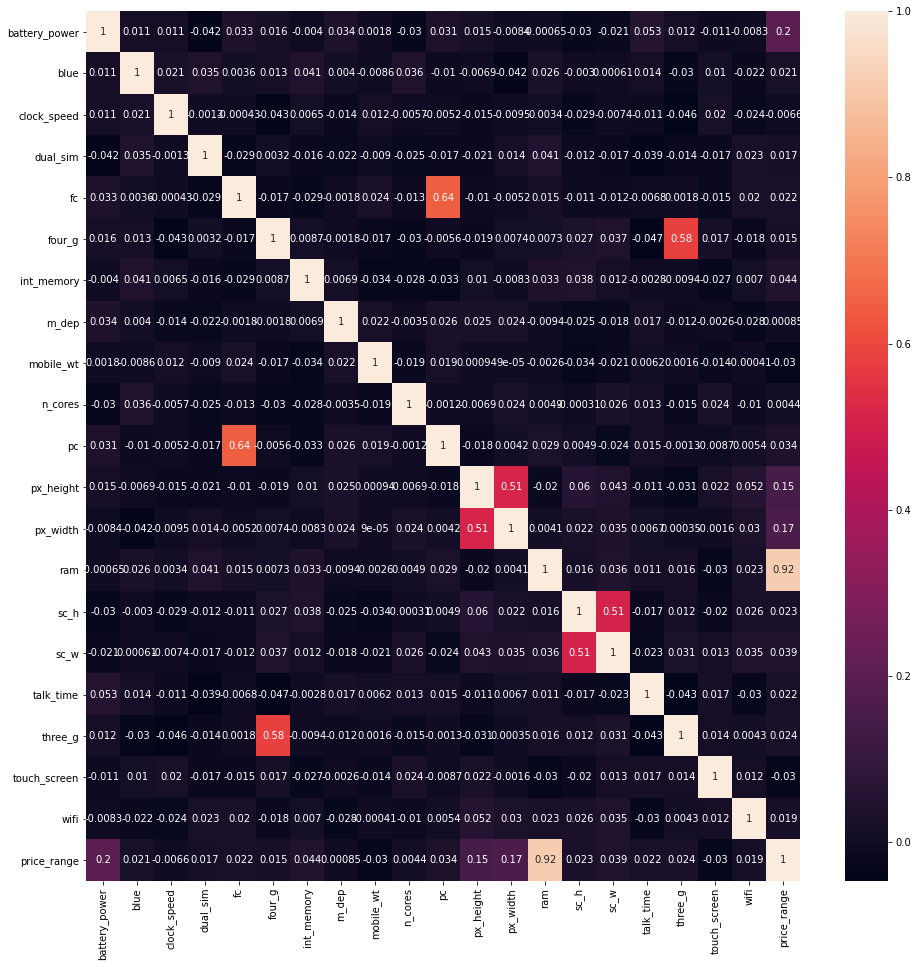

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (16,16))
sns.heatmap(cell_corr, annot = True)
plt.show()

### It really does look like the data is independent enough that dropping any columns for that reason wouldn't make sense although an argument could be made for px_height/px_width

### Perhaps we could rank the columns and see which ones are most important to the result. This information can help us in many ways:
* Better understand the dataset we are working with
* Better understand the model and how it is coming to a result
* Reduce the number of data features to make modeling more efficient

### There are a number of ways to decide which features are most important.  Let's look at one of them.  

In [21]:
from sklearn.inspection import permutation_importance
imps = permutation_importance(classifier, cell_train_ind, cell_train_dep)

np.set_printoptions(suppress=True)
column_names = list(cell_train.columns)
column_names.remove('price_range')

cols_to_not_scale_names = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']

column_names_iter = column_names.copy()
for item in column_names_iter:
    if item in cols_to_not_scale_names:
        column_names.remove(item)
        column_names.append(item+"-0")
        column_names.append(item+"-1")

for column in range(len(imps.importances_mean)):
    print('{:<15s}{:>3.3f}'.format(column_names[column],imps.importances_mean[column]))

battery_power  0.031
clock_speed    0.002
fc             0.004
int_memory     0.002
m_dep          0.002
mobile_wt      0.006
n_cores        0.009
pc             0.001
px_height      0.024
px_width       0.018
ram            0.545
sc_h           0.002
sc_w           0.002
talk_time      0.004
blue-0         -0.000
blue-1         -0.000
dual_sim-0     -0.002
dual_sim-1     -0.002
four_g-0       -0.001
four_g-1       -0.001
three_g-0      -0.001
three_g-1      -0.001
touch_screen-0 0.000
touch_screen-1 0.000
wifi-0         -0.000
wifi-1         -0.000


### It looks like few of the features have any affect on the price.  Let's create another model using "ram", "px_height", "px_width", and "battery_power"

In [22]:
cell_train_data_trimmed = cell_train.loc[:,['ram','px_height','px_width','battery_power']].to_numpy()

In [24]:
cell_train_data_trimmed

array([[2549,   20,  756,  842],
       [2631,  905, 1988, 1021],
       [2603, 1263, 1716,  563],
       ...,
       [3057,  868, 1632, 1911],
       [ 869,  336,  670, 1512],
       [3919,  483,  754,  510]], dtype=int64)

In [25]:
sc2 = StandardScaler()
cell_train_data_trimmed = sc2.fit_transform(cell_train_data_trimmed)
# Because these are all numeric columns, we don't have to worry about one-hot this time

In [26]:
cell_train_data_trimmed

array([[ 0.39170341, -1.40894856, -1.14678403, -0.90259726],
       [ 0.46731702,  0.58577791,  1.70446468, -0.49513857],
       [ 0.44149774,  1.39268422,  1.07496821, -1.5376865 ],
       ...,
       [ 0.86013895,  0.50238257,  0.88056489,  1.53077336],
       [-1.15745352, -0.69670724, -1.34581601,  0.62252745],
       [ 1.65500399, -0.3653798 , -1.15141268, -1.65833069]])

In [27]:
classifier2 = GaussianNB()
classifier2.fit(cell_train_data_trimmed, cell_train_dep)

GaussianNB()

In [28]:
cell_test_ind_trimmed = cell_test.loc[:,['ram','px_height','px_width','battery_power']].to_numpy()
cell_test_ind_trimmed = sc2.fit_transform(cell_test_ind_trimmed)
test_data_pred_trimmed = classifier2.predict(cell_test_ind_trimmed)
diff_count = 0
num_rows = 0
for item in range(len(test_data_pred_trimmed)):
    print(test_data_pred_trimmed[item], " - ",test_data_pred[item])
    num_rows += 1
    if test_data_pred_trimmed[item] != test_data_pred[item]:
        diff_count += 1
print("number of differences = ",diff_count)
print("number of rows = ",num_rows)

3  -  3
3  -  3
2  -  2
3  -  3
1  -  1
3  -  3
3  -  3
1  -  1
3  -  3
0  -  0
3  -  3
3  -  3
0  -  0
0  -  0
2  -  2
0  -  0
1  -  1
2  -  2
3  -  3
2  -  2
1  -  1
3  -  3
1  -  1
2  -  1
3  -  3
0  -  0
2  -  2
0  -  0
3  -  3
0  -  0
2  -  2
0  -  0
3  -  3
0  -  0
0  -  0
1  -  1
3  -  3
1  -  1
2  -  2
2  -  2
1  -  1
2  -  2
0  -  0
0  -  0
0  -  0
0  -  0
1  -  1
2  -  2
1  -  1
2  -  2
2  -  2
0  -  0
2  -  2
1  -  1
3  -  3
0  -  0
3  -  3
1  -  1
1  -  1
3  -  3
3  -  3
3  -  3
1  -  1
2  -  1
1  -  1
1  -  1
1  -  1
3  -  2
1  -  1
1  -  1
1  -  1
1  -  1
2  -  2
3  -  3
3  -  3
0  -  0
2  -  2
0  -  0
2  -  2
3  -  3
0  -  0
3  -  3
3  -  3
0  -  0
3  -  3
0  -  0
3  -  3
1  -  1
2  -  2
0  -  0
1  -  1
1  -  1
2  -  2
0  -  0
2  -  2
1  -  1
0  -  0
2  -  2
1  -  1
2  -  3
1  -  1
0  -  0
0  -  0
3  -  2
1  -  1
2  -  2
0  -  0
1  -  1
2  -  2
3  -  3
3  -  3
3  -  3
1  -  1
3  -  3
3  -  3
3  -  3
3  -  3
1  -  1
3  -  3
0  -  0
0  -  0
3  -  3
2  -  2
1  -  1
1  -  1


### We've managed to remove 16 columns and got a model that is about 6% different.

### It won't be a perfect comparison but let's split our training data so we can test with known results and compare these two models to see which is better

In [30]:
from sklearn.model_selection import train_test_split
cell_train_ind = cell_train.loc[:,"battery_power":"wifi"].to_numpy()
cell_train_dep = cell_train.loc[:,"price_range"]

x_train, x_test, y_train, y_test = train_test_split(cell_train_ind,cell_train_dep, test_size=0.3, random_state = 0)

In [31]:
split_train_data_to_scale = x_train[:,cols_to_scale]
split_train_data_to_not_scale = x_train[:,cols_to_not_scale]
split_train_ind_scaled = sc.fit_transform(split_train_data_to_scale)
split_train_ind_enc = ohe.fit_transform(split_train_data_to_not_scale)
split_train_dataset = np.concatenate([split_train_ind_scaled,split_train_ind_enc],axis=1)

split_test_data_to_scale = x_test[:,cols_to_scale]
split_test_data_to_not_scale = x_test[:,cols_to_not_scale]
split_test_ind_scaled = sc.fit_transform(split_test_data_to_scale)
split_test_ind_enc = ohe.fit_transform(split_test_data_to_not_scale)
split_test_dataset = np.concatenate([split_test_ind_scaled,split_test_ind_enc],axis=1)

#test_data_pred = classifier.predict(cell_test_ind)
#print(test_data_pred)

In [32]:
classifier2 = GaussianNB()
classifier2.fit(split_train_dataset, y_train)

GaussianNB()

In [33]:
#print(split_train_dataset)
x_train_trimmed = split_train_dataset[:,[10,8,9,0]]
x_test_trimmed = split_test_dataset[:,[10,8,9,0]]

classifier3 = GaussianNB()
classifier3.fit(x_train_trimmed,y_train)

GaussianNB()

In [34]:
print("all features with train data: ", classifier2.score(split_train_dataset,y_train))
print("all features with test data: ", classifier2.score(split_test_dataset,y_test))
print("trimmed features with train data: ", classifier3.score(x_train_trimmed,y_train))
print("trimmed features with test data: ", classifier3.score(x_test_trimmed,y_test))

all features with train data:  0.8092857142857143
all features with test data:  0.8233333333333334
trimmed features with train data:  0.7957142857142857
trimmed features with test data:  0.805


### This tells us that, again, it appears that the trimmed dataset does similarly to the not trimmed dataset.
### Let's have a look at a complex ROC curve of our model

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Binarize the output
y = label_binarize(cell_train_dep, classes=[0, 1, 2, 3])
# print(y)
n_classes = y.shape[1]
# print(n_classes)

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(cell_train_ind, y, test_size=.5,random_state=0)

# Learn to predict each class against the other
classifier4 = OneVsRestClassifier(GaussianNB())
y_score = classifier4.fit(X_train, y_train).predict_proba(X_test)
# print(y_score)
# print(y_test)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

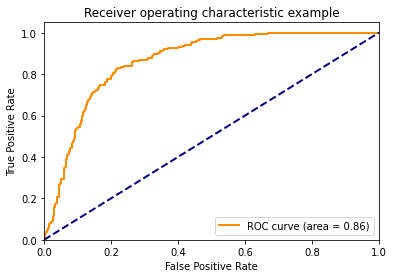

In [36]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

C:\Users\magilbertson\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  import sys


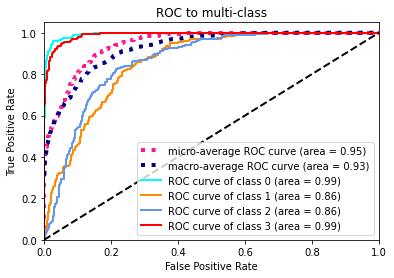

In [37]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC to multi-class')
plt.legend(loc="lower right")
plt.show()